# Loading the Libraries

In [1]:
# used to supress display of warnings
import warnings

# os is used to provide a way of using operating system dependent functionality
# We use it for setting working folder
import os
 
# Pandas is used for data manipulation and analysis
import pandas as pd 
 
# Numpy is used for large, multi-dimensional arrays and matrices, along with mathematical operators on these arrays
import numpy as np
 
# Matplotlib is a data visualization library for 2D plots of arrays, built on NumPy arrays 
# and designed to work with the broader SciPy stack
import matplotlib.pyplot as plt
from matplotlib import pyplot

# Seaborn is based on matplotlib, which aids in drawing attractive and informative statistical graphics.
import seaborn as sns
import tensorflow as tf
print(tf.__version__)

# All tensorflow library whch helps in creating Convolution Neural Network
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from PIL import Image
from PIL import ImageMath

2.5.0


In [2]:
# suppress display of warnings
warnings.filterwarnings('ignore')
 
# display all dataframe columns
pd.options.display.max_columns = None
 
# display all dataframe rows
pd.options.display.max_rows = None

## 1. Import the data. Analyse the dimensions of the data.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/AI ML Great Learning/CNN/'

In [ ]:
import os
os.chdir(path)
!ls -l

total 366151
-rw------- 1 root root 374466436 Jun  3 12:24 17flowers.zip
drwx------ 2 root root      4096 May 19 17:30 mobile-images
-rw------- 1 root root    467463 May 19 17:16 mobile-images-20210510T092407Z-001.zip


In [ ]:
from zipfile import ZipFile

In [ ]:
with ZipFile(path+'17flowers.zip', 'r') as f:
  f.extractall()

In [ ]:
!ls -l

total 366155
drwx------ 3 root root      4096 Jun 17 14:22 17flowers
-rw------- 1 root root 374466436 Jun  3 12:24 17flowers.zip
drwx------ 2 root root      4096 May 19 17:30 mobile-images
-rw------- 1 root root    467463 May 19 17:16 mobile-images-20210510T092407Z-001.zip


In [ ]:
os.chdir('17flowers')
!ls -l

total 858554
-rw-------  1 root root 818883452 Jun 17 14:22 17flowers.pkl
-rw-------  1 root root  60270631 Jun 17 14:22 17flowers.tgz
drwx------ 19 root root      4096 Jun 17 14:22 jpg


In [ ]:
!rm 17flowers.pkl 17flowers.tgz
os.chdir('jpg')
!ls -l

total 108
drwx------ 2 root root  4096 Jun 17 14:22 0
drwx------ 2 root root  4096 Jun 17 14:22 1
drwx------ 2 root root  4096 Jun 17 14:22 10
drwx------ 2 root root  4096 Jun 17 14:22 11
drwx------ 2 root root  4096 Jun 17 14:22 12
drwx------ 2 root root  4096 Jun 17 14:22 13
drwx------ 2 root root  4096 Jun 17 14:22 14
drwx------ 2 root root  4096 Jun 17 14:22 15
drwx------ 2 root root  4096 Jun 17 14:22 16
drwx------ 2 root root  4096 Jun 17 14:22 2
drwx------ 2 root root  4096 Jun 17 14:22 3
drwx------ 2 root root  4096 Jun 17 14:22 4
drwx------ 2 root root  4096 Jun 17 14:22 5
drwx------ 2 root root  4096 Jun 17 14:22 6
drwx------ 2 root root  4096 Jun 17 14:22 7
drwx------ 2 root root  4096 Jun 17 14:22 8
drwx------ 2 root root  4096 Jun 17 14:22 9
-rw------- 1 root root 20399 Jun 17 14:22 files.txt
-rw------- 1 root root 20410 Jun 17 14:22 files.txt~


In [ ]:
!rm files.txt files.txt~

In [ ]:
os.chdir('/content/drive/My Drive/AI ML Great Learning/CNN/17flowers/jpg')
!ls -la

total 81
drwx------ 2 root root  4096 Jun 17 14:22 0
drwx------ 2 root root  4096 Jun 17 14:22 1
drwx------ 2 root root  4096 Jun 17 14:22 10
drwx------ 2 root root  4096 Jun 17 14:22 11
drwx------ 2 root root  4096 Jun 17 14:22 12
drwx------ 2 root root  4096 Jun 17 14:22 13
drwx------ 2 root root  4096 Jun 17 14:22 14
drwx------ 2 root root  4096 Jun 17 14:22 15
drwx------ 2 root root  4096 Jun 17 14:22 16
drwx------ 2 root root  4096 Jun 17 14:22 2
drwx------ 2 root root  4096 Jun 17 14:22 3
drwx------ 2 root root  4096 Jun 17 14:22 4
drwx------ 2 root root  4096 Jun 17 14:22 5
drwx------ 2 root root  4096 Jun 17 14:22 6
drwx------ 2 root root  4096 Jun 17 14:22 7
drwx------ 2 root root  4096 Jun 17 14:22 8
drwx------ 2 root root  4096 Jun 17 14:22 9
-rw------- 1 root root 12292 Jun 17 14:22 .DS_Store


In [ ]:
!rm .DS_Store

In [ ]:
os.chdir('0')
!ls -l

total 2982
-rw------- 1 root root 52074 Jun 17 14:22 image_0001.jpg
-rw------- 1 root root 42230 Jun 17 14:22 image_0002.jpg
-rw------- 1 root root 47305 Jun 17 14:22 image_0003.jpg
-rw------- 1 root root 30888 Jun 17 14:22 image_0004.jpg
-rw------- 1 root root 33520 Jun 17 14:22 image_0005.jpg
-rw------- 1 root root 28427 Jun 17 14:22 image_0006.jpg
-rw------- 1 root root 38840 Jun 17 14:22 image_0007.jpg
-rw------- 1 root root 34031 Jun 17 14:22 image_0008.jpg
-rw------- 1 root root 32056 Jun 17 14:22 image_0009.jpg
-rw------- 1 root root 41286 Jun 17 14:22 image_0010.jpg
-rw------- 1 root root 35442 Jun 17 14:22 image_0011.jpg
-rw------- 1 root root 36551 Jun 17 14:22 image_0012.jpg
-rw------- 1 root root 49112 Jun 17 14:22 image_0013.jpg
-rw------- 1 root root 31451 Jun 17 14:22 image_0014.jpg
-rw------- 1 root root 34745 Jun 17 14:22 image_0015.jpg
-rw------- 1 root root 30205 Jun 17 14:22 image_0016.jpg
-rw------- 1 root root 37789 Jun 17 14:22 image_0017.jpg
-rw------- 1 root ro

In [ ]:
os.chdir('0')
!ls -l | tail -20

-rw------- 1 root root 44613 Jun 17 14:22 image_0061.jpg
-rw------- 1 root root 35067 Jun 17 14:22 image_0062.jpg
-rw------- 1 root root 28635 Jun 17 14:22 image_0063.jpg
-rw------- 1 root root 31991 Jun 17 14:22 image_0064.jpg
-rw------- 1 root root 27923 Jun 17 14:22 image_0065.jpg
-rw------- 1 root root 24119 Jun 17 14:22 image_0066.jpg
-rw------- 1 root root 22656 Jun 17 14:22 image_0067.jpg
-rw------- 1 root root 34415 Jun 17 14:22 image_0068.jpg
-rw------- 1 root root 60886 Jun 17 14:22 image_0069.jpg
-rw------- 1 root root 33945 Jun 17 14:22 image_0070.jpg
-rw------- 1 root root 33447 Jun 17 14:22 image_0071.jpg
-rw------- 1 root root 27477 Jun 17 14:22 image_0072.jpg
-rw------- 1 root root 49789 Jun 17 14:22 image_0073.jpg
-rw------- 1 root root 30117 Jun 17 14:22 image_0074.jpg
-rw------- 1 root root 57819 Jun 17 14:22 image_0075.jpg
-rw------- 1 root root 42125 Jun 17 14:22 image_0076.jpg
-rw------- 1 root root 41242 Jun 17 14:22 image_0077.jpg
-rw------- 1 root root 35224 Ju

In [ ]:
!pwd

/content/drive/My Drive/AI ML Great Learning/CNN/17flowers/jpg/0


We have extracted our files and we can see different classes have different subfolder segeration. We will use the data in this hierarchical structure only. These subfolders will be as labels of different flowers.




*   Setting path_img variable as Final Path for our Image location would be:





In [4]:
path_img = '/content/drive/My Drive/AI ML Great Learning/CNN/17flowers/jpg'

# Analyze Data and Dimensions of data

In [5]:
import cv2

In [ ]:
im = cv2.imread(path_img+'/0/image_0001.jpg')
im.shape

(500, 689, 3)

In [6]:
# Randomely going to different folders to see the size of image
import random

for i in os.listdir(path_img):
  f = os.listdir(path_img+'/'+i)
  d = random.choice(f)
  im = cv2.imread(path_img+'/'+ i +'/' + d)
  print('Image 1 size from class ',i, ':', im.shape)
  d = random.choice(f)
  im = cv2.imread(path_img+'/'+ i +'/' + d)
  print('Image 2 size from class ',i, ':', im.shape)


Image 1 size from class  14 : (499, 535, 3)
Image 2 size from class  14 : (500, 550, 3)
Image 1 size from class  4 : (538, 499, 3)
Image 2 size from class  4 : (499, 660, 3)
Image 1 size from class  9 : (500, 558, 3)
Image 2 size from class  9 : (500, 666, 3)
Image 1 size from class  16 : (499, 650, 3)
Image 2 size from class  16 : (500, 667, 3)
Image 1 size from class  1 : (584, 500, 3)
Image 2 size from class  1 : (625, 500, 3)
Image 1 size from class  3 : (500, 677, 3)
Image 2 size from class  3 : (751, 500, 3)
Image 1 size from class  6 : (500, 666, 3)
Image 2 size from class  6 : (500, 666, 3)
Image 1 size from class  5 : (500, 666, 3)
Image 2 size from class  5 : (556, 500, 3)
Image 1 size from class  10 : (500, 750, 3)
Image 2 size from class  10 : (500, 534, 3)
Image 1 size from class  15 : (500, 513, 3)
Image 2 size from class  15 : (500, 614, 3)
Image 1 size from class  13 : (583, 500, 3)
Image 2 size from class  13 : (502, 499, 3)
Image 1 size from class  2 : (725, 500, 3)
I

Data is in Three Dimensions and we have mostly different sizes (height, width). of all image. Even in same class folder image size is different.

# 2. Preprocess the data.

Data Preprocessing involves task such as resizing the images to reduce computations and make the image ready to for processing by Algorithm. It include following tasks:
1. Reading the Images
2. Resize the images so that all images are of same size. If an image is of size (733, 500, 3), if we can resize the same to lesser size say (128, 128, 3) we will have to perform less computations.
3. Last we can apply different-2 filters like blur to remove noise from image and refine our images.

We are going to use ImageDataGenerator technique. Image preprocessing will be taken care by ImageDataGenerator implicitly. We would not require these steps separately. We will handle these things as part of image data generator itself.

# 3. Visualizing the Image

In [7]:
from matplotlib import pyplot as plt
from matplotlib import image as mpimg

## Display Image

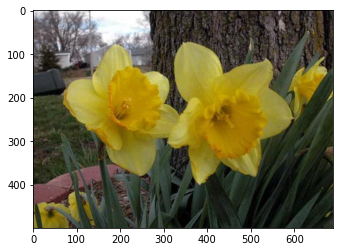

In [ ]:
img = mpimg.imread(path_img+'/0/image_0001.jpg')
plt.imshow(img);

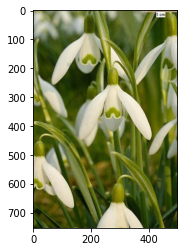

In [ ]:
img = mpimg.imread(path_img+'/1/image_0087.jpg')
plt.imshow(img);

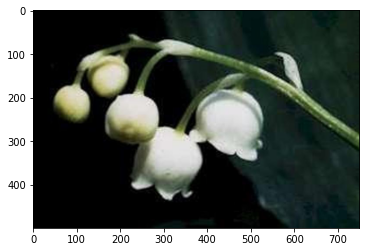

In [ ]:
img = mpimg.imread(path_img+'/2/image_0161.jpg')
plt.imshow(img);

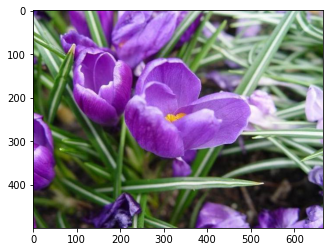

In [ ]:
img = mpimg.imread(path_img+'/4/image_0321.jpg')
plt.imshow(img);

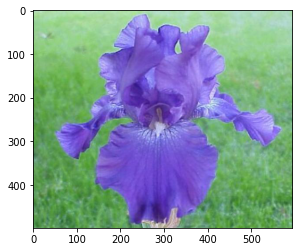

In [ ]:
img = mpimg.imread(path_img+'/5/image_0404.jpg')
plt.imshow(img);

### Randomly going through different folders and displaying one images from each class


In [ ]:
for i in os.listdir(path_img):
  f = os.listdir(path_img+'/'+i)
  
  img = random.choice(f)
  plt.imshow(mpimg.imread(path_img+'/'+ i +'/' + img))
  plt.xlabel(i) # For displaying label with image
  plt.show()

Output hidden; open in https://colab.research.google.com to view.

## Display Lables
##### Lables are sub folder names inside '17flowers' folder as shown above

In [ ]:
print(path_img)

/content/drive/My Drive/AI ML Great Learning/CNN/17flowers/jpg


In [ ]:
for label in os.listdir(path_img):
  print('Class Label : '+ label)

Class Label : 14
Class Label : 4
Class Label : 9
Class Label : 16
Class Label : 1
Class Label : 3
Class Label : 6
Class Label : 5
Class Label : 10
Class Label : 15
Class Label : 13
Class Label : 2
Class Label : 0
Class Label : 12
Class Label : 11
Class Label : 8
Class Label : 7


## Display images vs Labels

In [ ]:
for label in os.listdir(path_img):
  f = os.listdir(path_img+'/'+label)

  plt.figure(figsize = (20,20))
  for i in range(1, 4):
    plt.subplot(1, 4, i+1)
    img = random.choice(f)
    plt.imshow(mpimg.imread(path_img+'/'+ label +'/' + img),  )
    plt.title('Flower Label : '+label) # For displaying label with image
    plt.axis('off')

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
for label in os.listdir(path_img):
  print('Class '+label+' has total images = '+ str(len(os.listdir(path_img+'/'+label))))

Class 14 has total images = 80
Class 4 has total images = 80
Class 9 has total images = 80
Class 16 has total images = 80
Class 1 has total images = 80
Class 3 has total images = 80
Class 6 has total images = 80
Class 5 has total images = 80
Class 10 has total images = 80
Class 15 has total images = 80
Class 13 has total images = 80
Class 2 has total images = 80
Class 0 has total images = 80
Class 12 has total images = 80
Class 11 has total images = 80
Class 8 has total images = 80
Class 7 has total images = 80


All 17 classes have exactly 80 images.

## Apply different filters [ for example: blur, contour, edge detection, emboss, smooth etc.] on the images and display the image.

#### 1. Blur Image

The blur, or smoothing, of an image removes “outlier” pixels that may be noise in the image. Blurring is an example of applying a low-pass filter to an image. In computer vision, the term “low-pass filter” applies to removing noise from an image while leaving the majority of the image intact.

In [ ]:
ksize = (20,20)

for label in os.listdir(path_img):
  f = os.listdir(path_img+'/'+label)
  img = random.choice(f)
  img = mpimg.imread(path_img+'/'+label+'/'+img)
  
  blur_img = cv2.blur(img, ksize)

  plt.figure(figsize=(10,10))
  plt.subplot(121), plt.imshow(img), plt.title('Original Label '+label)
  plt.subplot(122), plt.imshow(blur_img),plt.title('Blur filter')
  plt.show()


Output hidden; open in https://colab.research.google.com to view.

#### 2. Vertical/Horizonal Flip of Image

In [ ]:
for label in os.listdir(path_img):
  f = os.listdir(path_img+'/'+label)
  img = random.choice(f)
  img = mpimg.imread(path_img+'/'+label+'/'+img)
  
  #blur_img = cv2.blur(img, ksize)
  x_flip_image = cv2.flip(img, 0)
  y_flip_image = cv2.flip(img, 1)
  b_flip_image = cv2.flip(img, -1)

  plt.figure(figsize=(15,15))
  plt.subplot(1, 5, 1), plt.imshow(img), plt.title('Original Label '+label)
  plt.subplot(1, 5, 2), plt.imshow(x_flip_image),plt.title('X axis Flip')
  plt.subplot(1, 5, 3), plt.imshow(y_flip_image),plt.title('Y axis Flip')
  plt.subplot(1, 5, 4), plt.imshow(b_flip_image),plt.title('Both Axis Flip')
  plt.show()

Output hidden; open in https://colab.research.google.com to view.

#### 3. Edge Detection

In edge detection, we find the boundaries or edges of objects in an image, by determining where the brightness of the image changes dramatically. Edge detection can be used to extract the structure of objects in an image.

In [ ]:
for label in os.listdir(path_img):
  f = os.listdir(path_img+'/'+label)
  img = random.choice(f)
  img = mpimg.imread(path_img+'/'+label+'/'+img)
  
  edge_image = cv2.Canny(img,100,200)
 
  plt.figure(figsize=(15,15))
  plt.subplot(1, 2, 1), plt.imshow(img), plt.title('Original Label '+label)
  plt.subplot(1, 2, 2), plt.imshow(edge_image),plt.title('Edge Detection')
  plt.show()

Output hidden; open in https://colab.research.google.com to view.

#### 4. Median Blurring of Image

Central element of the image is replaced by the median of all the pixels in the kernel area. This operation processes the edges while removing the noise.

In [ ]:
for label in os.listdir(path_img):
  f = os.listdir(path_img+'/'+label)
  img = random.choice(f)
  img = mpimg.imread(path_img+'/'+label+'/'+img)
  
  plt.figure(figsize=(25, 25))
  plt.subplot(1, 5, 1), plt.imshow(img), plt.title('Original Label '+label)
  plt.subplot(1, 5, 2), plt.imshow(cv2.medianBlur(img, 5)),plt.title('Median Blur k 5')
  plt.subplot(1, 5, 3), plt.imshow(cv2.medianBlur(img, 9)),plt.title('Median Blur k 9')
  plt.subplot(1, 5, 4), plt.imshow(cv2.medianBlur(img, 13)),plt.title('Median Blur k 11')

  plt.show()

Output hidden; open in https://colab.research.google.com to view.

### Emboss Filtering on image

Image embossing is a computer graphics technique in which each pixel of an image is replaced either by a highlight or a shadow, depending on light/dark boundaries on the original image. Low contrast areas are replaced by a gray background

In [ ]:
for label in os.listdir(path_img):
  f = os.listdir(path_img+'/'+label)
  img = random.choice(f)
  img = mpimg.imread(path_img+'/'+label+'/'+img)
  height, width = img.shape[:2]

  y = np.ones((height, width), np.uint8) * 128
  emboss3 = np.zeros((height, width), np.uint8)
  
  # Generating the kernels
  kernel1 = np.array([[0, -1, -1], # kernel for embossing bottom left side
                      [1, 0, -1],
                      [1, 1, 0]])
  kernel2 = np.array([[-1, -1, 0], # kernel for embossing bottom right side
                      [-1, 0, 1],
                      [0, 1, 1]])

  # you can generate kernels for embossing top as well
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  emboss1 = cv2.add(cv2.filter2D(gray, -1, kernel1), y) # emboss on bottom left side
  emboss2 = cv2.add(cv2.filter2D(gray, -1, kernel2), y) # emboss on bottom right side

  for i in range(height):
    for j in range(width):
        emboss3[i, j] = max(emboss1[i, j], emboss2[i, j]) # combining both embosses to produce stronger emboss
  plt.figure(figsize=(20, 20))
  plt.subplot(1, 5, 1), plt.imshow(img), plt.title('Original Label '+label)
  plt.subplot(1, 5, 2), plt.imshow(emboss1),plt.title('Emboss 1')
  plt.subplot(1, 5, 3), plt.imshow(emboss2),plt.title('Emboss 2')
  plt.subplot(1, 5, 4), plt.imshow(emboss3),plt.title('Emboss 3')
  
  plt.show()

Output hidden; open in https://colab.research.google.com to view.

### Using Image Data Generator to generate different types of Images with different filter applied

In [ ]:
img_gen = ImageDataGenerator(rescale=1./255,
                                  rotation_range=40,
                                  width_shift_range=0.3,
                                  height_shift_range=0.3,
                                  #brightness_range=[0.4,0.6],
                                  fill_mode='nearest',
                                  shear_range = 0.2,
                                  horizontal_flip=True,
                                  vertical_flip=True,
                                  zoom_range = 0.2,
                                  validation_split=0.0  )

img_filtered = img_gen.flow_from_directory(path_img, batch_size = 10)

# Displaying 30 images after applying filters from Image Data Generator
for _ in range(5):
    plt.figure(figsize = (30,30))
    for k in range(1,7):
      img, label = img_filtered.next()
      plt.subplot(1, 7, k+1)
      plt.imshow(img[0])
      plt.title('Label : '+ str(np.argmax(label)))
      plt.axis('off')

Output hidden; open in https://colab.research.google.com to view.

# 4. Train tune and test AIML image classifier model using:

### Use your own designed CNN for training



In [ ]:
# We will be working with image with size 150x150x3. All images during training and validation accuracy check will be first resized to 150x150x3 size
img_size = 150

img_generator= ImageDataGenerator(rescale=1./255,
                                  rotation_range=20,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip=True,
                                  vertical_flip=True,
                                  fill_mode = 'nearest',
                                  validation_split=0.2)

#Build training generator
train_generator = img_generator.flow_from_directory(path_img,
                                                    target_size=(img_size, img_size),
                                                    subset='training',
                                                    batch_size=34)

#Build test generator
test_generator = img_generator.flow_from_directory(path_img,
                                                   target_size=(img_size, img_size),                            
                                                   subset='validation',
                                                   batch_size=34)

Found 1088 images belonging to 17 classes.
Found 272 images belonging to 17 classes.


In [ ]:
# Model 1 : 

flw_model = Sequential()

# Addiing convolution layers and max pool layers
flw_model.add(Conv2D(32, kernel_size = (3,3), activation='relu', input_shape = (img_size, img_size, 3)))
flw_model.add(Conv2D(64, kernel_size = (3,3), activation='relu'))

flw_model.add(MaxPooling2D(pool_size=(2,2)))

flw_model.add(Conv2D(128, kernel_size = (3,3), activation='relu'))
flw_model.add(Conv2D(128, kernel_size = (3,3), activation='relu'))

flw_model.add(MaxPooling2D(pool_size=(2,2)))

# Addiing Global Average Pooling to control weights
flw_model.add(GlobalAveragePooling2D())

flw_model.add(Flatten())

flw_model.add(Dense(17, activation='softmax'))

flw_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 146, 146, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 69, 69, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 34, 34, 128)       0         
_________________________________________________________________
global_average_pooling2d (Gl (None, 128)               0

In [ ]:
# Compile the model. Using categorical_crossentropy as loss as we have multiple classes
flw_model.compile(optimizer='rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
### Training the model
flw_model.fit_generator(train_generator, epochs = 30,  validation_data=test_generator, steps_per_epoch=1088//34, validation_steps=272//34 )

Epoch 1/30
32/32 [==============================] - 193s 5s/step - loss: 2.6845 - accuracy: 0.1176 - val_loss: 2.4176 - val_accuracy: 0.1801
Epoch 2/30
32/32 [==============================] - 15s 459ms/step - loss: 2.3501 - accuracy: 0.2086 - val_loss: 2.2379 - val_accuracy: 0.2279
Epoch 3/30
32/32 [==============================] - 14s 450ms/step - loss: 2.2214 - accuracy: 0.2730 - val_loss: 2.0495 - val_accuracy: 0.2500
Epoch 4/30
32/32 [==============================] - 14s 450ms/step - loss: 2.0517 - accuracy: 0.3116 - val_loss: 2.0128 - val_accuracy: 0.3272
Epoch 5/30
32/32 [==============================] - 15s 455ms/step - loss: 1.9744 - accuracy: 0.3741 - val_loss: 1.9766 - val_accuracy: 0.3603
Epoch 6/30
32/32 [==============================] - 15s 463ms/step - loss: 1.8979 - accuracy: 0.3787 - val_loss: 1.7168 - val_accuracy: 0.4301
Epoch 7/30
32/32 [==============================] - 15s 456ms/step - loss: 1.8045 - accuracy: 0.3888 - val_loss: 1.8630 - val_accuracy: 0.3971
E

In [ ]:
### Training the model further as accuracy is not much good even after 30 epochs
flw_model.fit_generator(train_generator, epochs = 20, validation_data=test_generator, steps_per_epoch=1088//34, validation_steps=272//34)

Epoch 1/20
32/32 [==============================] - 15s 471ms/step - loss: 1.2490 - accuracy: 0.5956 - val_loss: 1.4077 - val_accuracy: 0.5919
Epoch 2/20
32/32 [==============================] - 15s 460ms/step - loss: 1.3201 - accuracy: 0.5772 - val_loss: 1.6580 - val_accuracy: 0.5478
Epoch 3/20
32/32 [==============================] - 15s 470ms/step - loss: 1.2544 - accuracy: 0.6002 - val_loss: 1.5458 - val_accuracy: 0.5662
Epoch 4/20
32/32 [==============================] - 14s 452ms/step - loss: 1.2434 - accuracy: 0.5938 - val_loss: 1.3738 - val_accuracy: 0.6287
Epoch 5/20
32/32 [==============================] - 15s 459ms/step - loss: 1.2086 - accuracy: 0.6057 - val_loss: 1.3642 - val_accuracy: 0.5993
Epoch 6/20
32/32 [==============================] - 15s 472ms/step - loss: 1.2140 - accuracy: 0.6057 - val_loss: 1.6422 - val_accuracy: 0.5588
Epoch 7/20
32/32 [==============================] - 15s 462ms/step - loss: 1.1714 - accuracy: 0.6351 - val_loss: 1.7688 - val_accuracy: 0.5515

In [ ]:
### Training the model further as accuracy is not much good even after 50 epochs
flw_model.fit_generator(train_generator, epochs = 20, validation_data=test_generator, steps_per_epoch=1088//34, validation_steps=272//34)

Epoch 1/20
32/32 [==============================] - 15s 464ms/step - loss: 0.9970 - accuracy: 0.6737 - val_loss: 1.4022 - val_accuracy: 0.6360
Epoch 2/20
32/32 [==============================] - 14s 451ms/step - loss: 1.0161 - accuracy: 0.6710 - val_loss: 1.4375 - val_accuracy: 0.5662
Epoch 3/20
32/32 [==============================] - 15s 453ms/step - loss: 1.0136 - accuracy: 0.6783 - val_loss: 1.4277 - val_accuracy: 0.6103
Epoch 4/20
32/32 [==============================] - 15s 454ms/step - loss: 1.0006 - accuracy: 0.6884 - val_loss: 1.6698 - val_accuracy: 0.5956
Epoch 5/20
32/32 [==============================] - 15s 453ms/step - loss: 0.9999 - accuracy: 0.6829 - val_loss: 1.6095 - val_accuracy: 0.5368
Epoch 6/20
32/32 [==============================] - 15s 453ms/step - loss: 0.9657 - accuracy: 0.6838 - val_loss: 1.5125 - val_accuracy: 0.5735
Epoch 7/20
32/32 [==============================] - 15s 454ms/step - loss: 0.9400 - accuracy: 0.6939 - val_loss: 1.5604 - val_accuracy: 0.6103

In [ ]:
### Training the model further as accuracy is not much good even after 70 epochs
flw_model.fit_generator(train_generator, epochs = 40, validation_data=test_generator, steps_per_epoch=1088//34, validation_steps=272//34)

Epoch 1/40
32/32 [==============================] - 15s 461ms/step - loss: 0.7891 - accuracy: 0.7463 - val_loss: 1.4893 - val_accuracy: 0.6360
Epoch 2/40
32/32 [==============================] - 14s 442ms/step - loss: 0.8240 - accuracy: 0.7279 - val_loss: 1.5269 - val_accuracy: 0.6397
Epoch 3/40
32/32 [==============================] - 14s 442ms/step - loss: 0.8079 - accuracy: 0.7436 - val_loss: 1.4631 - val_accuracy: 0.6287
Epoch 4/40
32/32 [==============================] - 14s 452ms/step - loss: 0.7721 - accuracy: 0.7426 - val_loss: 1.9231 - val_accuracy: 0.6029
Epoch 5/40
32/32 [==============================] - 14s 444ms/step - loss: 0.8376 - accuracy: 0.7270 - val_loss: 1.4017 - val_accuracy: 0.6765
Epoch 6/40
32/32 [==============================] - 14s 444ms/step - loss: 0.7979 - accuracy: 0.7454 - val_loss: 1.5141 - val_accuracy: 0.5956
Epoch 7/40
32/32 [==============================] - 14s 446ms/step - loss: 0.7836 - accuracy: 0.7399 - val_loss: 1.4461 - val_accuracy: 0.6397

In [ ]:
### Training the model further to improve accuracy further is not much good even after 110 epochs
flw_model.fit_generator(train_generator, epochs = 40, validation_data=test_generator, steps_per_epoch=1088//34, validation_steps=272//34)

Epoch 1/40
32/32 [==============================] - 14s 432ms/step - loss: 0.5537 - accuracy: 0.8244 - val_loss: 1.8120 - val_accuracy: 0.6581
Epoch 2/40
32/32 [==============================] - 14s 430ms/step - loss: 0.5595 - accuracy: 0.8180 - val_loss: 1.6596 - val_accuracy: 0.5919
Epoch 3/40
32/32 [==============================] - 14s 425ms/step - loss: 0.5756 - accuracy: 0.8189 - val_loss: 1.4907 - val_accuracy: 0.6801
Epoch 4/40
32/32 [==============================] - 13s 420ms/step - loss: 0.5490 - accuracy: 0.8263 - val_loss: 1.5489 - val_accuracy: 0.6912
Epoch 5/40
32/32 [==============================] - 13s 420ms/step - loss: 0.5109 - accuracy: 0.8318 - val_loss: 1.4563 - val_accuracy: 0.6801
Epoch 6/40
32/32 [==============================] - 13s 420ms/step - loss: 0.5511 - accuracy: 0.8355 - val_loss: 1.9548 - val_accuracy: 0.6471
Epoch 7/40
32/32 [==============================] - 14s 423ms/step - loss: 0.5317 - accuracy: 0.8309 - val_loss: 1.9392 - val_accuracy: 0.6360

In [ ]:
### Training the model further by 50 epochs to improve accuracy further, We are getting valdiation accuracy of 68 now after 150 epochs
flw_model.fit_generator(train_generator, epochs = 50, validation_data=test_generator, steps_per_epoch=1088//34, validation_steps=272//34)

Epoch 1/50
32/32 [==============================] - 15s 461ms/step - loss: 0.3748 - accuracy: 0.8778 - val_loss: 2.1626 - val_accuracy: 0.6287
Epoch 2/50
32/32 [==============================] - 14s 445ms/step - loss: 0.3729 - accuracy: 0.8842 - val_loss: 1.4753 - val_accuracy: 0.6838
Epoch 3/50
32/32 [==============================] - 14s 445ms/step - loss: 0.3830 - accuracy: 0.8833 - val_loss: 1.8260 - val_accuracy: 0.6912
Epoch 4/50
32/32 [==============================] - 14s 442ms/step - loss: 0.3696 - accuracy: 0.8824 - val_loss: 2.0909 - val_accuracy: 0.6397
Epoch 5/50
32/32 [==============================] - 14s 444ms/step - loss: 0.4033 - accuracy: 0.8732 - val_loss: 2.2570 - val_accuracy: 0.6434
Epoch 6/50
32/32 [==============================] - 14s 451ms/step - loss: 0.3961 - accuracy: 0.8787 - val_loss: 1.8406 - val_accuracy: 0.6875
Epoch 7/50
32/32 [==============================] - 14s 450ms/step - loss: 0.3709 - accuracy: 0.8759 - val_loss: 1.9048 - val_accuracy: 0.6838

We are able to reach a maximum accuracy of 92% on training set and maximum accuracy of 73% on test set. We have trained the model for 200 epochs.

Creating CNN model again with few more hidden layers. Addding FC layer and dropout after it.

In [ ]:
# Model 2 : Adding few more layers

flw_model2 = Sequential()

flw_model2.add(Conv2D(32, kernel_size = (3,3), activation='relu', input_shape = (img_size, img_size, 3)))
flw_model2.add(Conv2D(64, kernel_size = (3,3), activation='relu'))

flw_model2.add(MaxPooling2D(pool_size=(2,2)))

flw_model2.add(Conv2D(128, kernel_size = (3,3), activation='relu'))
flw_model2.add(MaxPooling2D(2,2))

flw_model2.add(Conv2D(128, kernel_size = (3,3), activation='relu'))
flw_model2.add(MaxPooling2D(pool_size=(2,2)))

flw_model2.add(GlobalAveragePooling2D())

# Converting output to one dimension
flw_model2.add(Flatten())

# Adding FC layers
flw_model2.add(Dense(80, activation = 'relu'))
flw_model2.add(Dropout(0.3))

# Output layer with neurons equal to number of class
flw_model2.add(Dense(17, activation='softmax'))

flw_model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 146, 146, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 35, 35, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 128)       147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 128)       0

In [ ]:
flw_model2.compile(optimizer='rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
### Training the model for 150 epochs.
flw_model2.fit_generator(train_generator, epochs = 150,  validation_data = test_generator, steps_per_epoch = 1088//34, validation_steps = 272//34 )

Epoch 1/150
32/32 [==============================] - 17s 407ms/step - loss: 2.7530 - accuracy: 0.0919 - val_loss: 2.5448 - val_accuracy: 0.1765
Epoch 2/150
32/32 [==============================] - 13s 406ms/step - loss: 2.5935 - accuracy: 0.1296 - val_loss: 2.3850 - val_accuracy: 0.1985
Epoch 3/150
32/32 [==============================] - 13s 404ms/step - loss: 2.4750 - accuracy: 0.1599 - val_loss: 2.3125 - val_accuracy: 0.2022
Epoch 4/150
32/32 [==============================] - 13s 404ms/step - loss: 2.3608 - accuracy: 0.2261 - val_loss: 2.1794 - val_accuracy: 0.2721
Epoch 5/150
32/32 [==============================] - 13s 404ms/step - loss: 2.2216 - accuracy: 0.2592 - val_loss: 2.3004 - val_accuracy: 0.2757
Epoch 6/150
32/32 [==============================] - 13s 407ms/step - loss: 2.1496 - accuracy: 0.2794 - val_loss: 1.8785 - val_accuracy: 0.3529
Epoch 7/150
32/32 [==============================] - 13s 410ms/step - loss: 2.0310 - accuracy: 0.3208 - val_loss: 1.8414 - val_accuracy:

In [ ]:
### Training the model for another 50 epochs
flw_model2.fit_generator(train_generator, epochs = 50,  validation_data = test_generator, steps_per_epoch = 1088//34, validation_steps = 272//34 )

Epoch 1/50
32/32 [==============================] - 14s 424ms/step - loss: 0.4761 - accuracy: 0.8456 - val_loss: 1.2496 - val_accuracy: 0.6728
Epoch 2/50
32/32 [==============================] - 13s 413ms/step - loss: 0.4793 - accuracy: 0.8336 - val_loss: 1.3652 - val_accuracy: 0.7096
Epoch 3/50
32/32 [==============================] - 13s 411ms/step - loss: 0.4661 - accuracy: 0.8483 - val_loss: 1.4114 - val_accuracy: 0.6838
Epoch 4/50
32/32 [==============================] - 13s 414ms/step - loss: 0.4708 - accuracy: 0.8483 - val_loss: 1.1878 - val_accuracy: 0.7169
Epoch 5/50
32/32 [==============================] - 13s 411ms/step - loss: 0.4556 - accuracy: 0.8438 - val_loss: 1.0445 - val_accuracy: 0.7206
Epoch 6/50
32/32 [==============================] - 13s 412ms/step - loss: 0.4951 - accuracy: 0.8300 - val_loss: 1.0801 - val_accuracy: 0.7426
Epoch 7/50
32/32 [==============================] - 13s 408ms/step - loss: 0.4452 - accuracy: 0.8438 - val_loss: 1.5201 - val_accuracy: 0.6838

Accuracy is not improving even after training for another 50 epochs. Both the model behaved the same way. 

##### CNN Model Summary
- In First model after 200 epochs we are getting almost 90% accuracy on Training set however maximum accuracy on validation set/Test set is ~70%
- In Second model we added few more hidden layers however for this model also we get training accuracy as 88% and validation/test set accuracy as ~72%. Deeper network is not imrpoving performance much.

### Test the Model for checking the classification

In [ ]:
cnn_model_size = (150, 150) # We choose image size as 150, 150 for all images for preprocessing input. 
cnn_img_4d_size = [1, 150, 150, 3] # 4D dimension is needed to perform prediction, so we will add 1 in beginning.
class_dict = train_generator.class_indices
class_list = list(class_dict.keys())

import random
import cv2

for label in os.listdir(path_img):
  f = os.listdir(path_img+'/'+label)
  
  # Picking any random picture from the class
  img = mpimg.imread(path_img+'/'+ label +'/' + random.choice(f))
  
  # Resizing the image for cv2
  img1 = cv2.resize(img, cnn_model_size, interpolation = cv2.INTER_AREA)
  img2 = np.reshape(img1, [1,img1.shape[0], img1.shape[1], img1.shape[2]]) # 1 has been added in begginig to make the shape 4D
  
  # Predicting the output
  predict = flw_model2.predict_classes(img2)
  predct_clas = class_list[predict]

  plt.imshow(img)
  plt.xlabel('Actual class : '+label +' Predicted '+ predct_clas)
  plt.show()

Output hidden; open in https://colab.research.google.com to view.

We get quite bad prediction. Only 5 images out of 17 images (where each image belong to a different class) were correctly predicted.

### Save the Model

In [ ]:
# Save model to disk
flw_model2_json = flw_model2.to_json()
with open("/content/drive/My Drive/AI ML Great Learning/CNN/CNN_flower_model.json", "w") as json_file:
    json_file.write(flw_model2_json)

# Serialize weights to HDF5
flw_model2.save_weights("/content/drive/My Drive/AI ML Great Learning/CNN/CNN_flower_model_weights.h5")

In [ ]:
os.chdir('/content/drive/My Drive/AI ML Great Learning/CNN')
!ls -l

total 463958
drwx------ 3 root root      4096 Jun 17 14:22 17flowers
-rw------- 1 root root 374466436 Jun  3 12:24 17flowers.zip
-rw------- 1 root root      4461 Jun 20 14:26 CNN_flower_model.json
-rw------- 1 root root   1038176 Jun 20 14:26 CNN_flower_model_weights.h5
drwx------ 2 root root      4096 May 19 17:30 mobile-images
-rw------- 1 root root    467463 May 19 17:16 mobile-images-20210510T092407Z-001.zip
-rw------- 1 root root     85629 Jun 20 08:36 res50_flower_model.json
-rw------- 1 root root  99021000 Jun 20 08:36 res50_flower_model_weights.h5


I have first saved the ResNet model below and then saved this CNN model from scrach.

## Use transferred learning models for training

We have almost 17*80 = 1360 images for 17 classes. Our dataset is small and different (output classes) from any model we pick as output classes are 17 and of flower.

### ResNet50 - For Transfer Learning

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

In [ ]:
# Loading model trained on imagenet data set which has almost 1000 classes
# As number of classes are not same we will have to set include_top=False while importing

res50_base_model = ResNet50(weights='imagenet', include_top=False)

x = res50_base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)

# We have 17 classes
predict_lyr = Dense(17, activation='softmax')(x)

# Building final model using ResNet50
res50_model = Model(inputs=res50_base_model.input, outputs=predict_lyr)

# Freeze all convolutional Layers for training. Train only the top layers (which were randomly initialized)

for layer in res50_base_model.layers:
    layer.trainable = False

res50_model.summary()

94773248/94765736 [==============================] - 1s 0us/step
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, None, None, 6 256         conv1_conv[0][0]                 
_____________________________

We are having only 1 Million trainable parameters (weight+bias) out of 23 million combined parameters (weight+bias) of the model. These are mainly because of Dense layer we added with 512 neurons.

In [ ]:
# Creating new ImageDataGenerator for training and test set.

tl_img_datagen  = ImageDataGenerator(validation_split = 0.2,
                                  preprocessing_function = preprocess_input)

#Build training generator
tl_train_generator = tl_img_datagen.flow_from_directory(path_img,
                                                    subset='training',
                                                    batch_size=34)

#Build test generator
tl_test_generator = tl_img_datagen.flow_from_directory(path_img,
                                                   subset='validation',
                                                   batch_size=34)

Found 1088 images belonging to 17 classes.
Found 272 images belonging to 17 classes.


In [ ]:
# Compile the model 
res50_model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
# Training the model for 50 epochs initially
res50_model.fit_generator(tl_train_generator, epochs = 50,  validation_data = tl_test_generator, steps_per_epoch = 1088//34, validation_steps = 272//34)

Epoch 1/50
32/32 [==============================] - 288s 8s/step - loss: 1.3488 - accuracy: 0.6765 - val_loss: 0.3572 - val_accuracy: 0.8824
Epoch 2/50
32/32 [==============================] - 10s 321ms/step - loss: 0.2425 - accuracy: 0.9283 - val_loss: 0.6262 - val_accuracy: 0.8529
Epoch 3/50
32/32 [==============================] - 10s 317ms/step - loss: 0.1316 - accuracy: 0.9669 - val_loss: 0.3803 - val_accuracy: 0.8934
Epoch 4/50
32/32 [==============================] - 10s 320ms/step - loss: 0.0587 - accuracy: 0.9835 - val_loss: 0.4040 - val_accuracy: 0.8897
Epoch 5/50
32/32 [==============================] - 10s 321ms/step - loss: 0.0560 - accuracy: 0.9835 - val_loss: 0.6346 - val_accuracy: 0.8382
Epoch 6/50
32/32 [==============================] - 10s 319ms/step - loss: 0.0470 - accuracy: 0.9899 - val_loss: 0.3250 - val_accuracy: 0.9081
Epoch 7/50
32/32 [==============================] - 10s 321ms/step - loss: 0.0106 - accuracy: 0.9982 - val_loss: 0.4466 - val_accuracy: 0.8971
E

We are able to get almost 100% accuracy on test set and also a very good accuracy of 93% on test set.

### Test the Model for checking the classification

In [ ]:
resnet_size = [1,667, 500, 3] # ResNet images are of size 667,500,3 after preprocessing input. 4D dimension is needed to perform prediction, so we will add 1 in beginning.
class_dict = tl_train_generator.class_indices
class_list = list(class_dict.keys())

import random

for label in os.listdir(path_img):
  f = os.listdir(path_img+'/'+label)
  
  # Picking any random picture from the class
  img = mpimg.imread(path_img+'/'+ label +'/' + random.choice(f))
  img1 = preprocess_input(img)
  img2 = np.reshape(img1, [1,img1.shape[0], img1.shape[1], img1.shape[2]]) # 1 has been added in begginig to make the shape 4D
  
  # Predicting the output
  predict = np.argmax(res50_model.predict(img2))
  predct_clas = class_list[predict]

  plt.imshow(img)
  plt.xlabel('Actual class : '+label +' Predicted '+ predct_clas)
  plt.show()

Output hidden; open in https://colab.research.google.com to view.

Almost all the classes are predicted correctly. Out of 17 images each from different class there are only 3 misclassifications, rest 14 images were correctly predicted.

### Save the Model

In [ ]:
# Save model to disk
res50_model_json = res50_model.to_json()
with open("/content/drive/My Drive/AI ML Great Learning/CNN/res50_flower_model.json", "w") as json_file:
    json_file.write(res50_model_json)

# Serialize weights to HDF5
res50_model.save_weights("/content/drive/My Drive/AI ML Great Learning/CNN/res50_flower_model_weights.h5")

In [ ]:
os.chdir('/content/drive/My Drive/AI ML Great Learning/CNN')
!ls -l

total 462940
drwx------ 3 root root      4096 Jun 17 14:22 17flowers
-rw------- 1 root root 374466436 Jun  3 12:24 17flowers.zip
drwx------ 2 root root      4096 May 19 17:30 mobile-images
-rw------- 1 root root    467463 May 19 17:16 mobile-images-20210510T092407Z-001.zip
-rw------- 1 root root     85629 Jun 20 08:36 res50_flower_model.json
-rw------- 1 root root  99021000 Jun 20 08:36 res50_flower_model_weights.h5


### VGG16 - For Transfer Learning

In [8]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import preprocess_input

In [9]:
# Loading model trained on imagenet data set which has almost 1000 classes
# As number of classes are not same we will have to set include_top=False while importing

vgg16_base_model = VGG16(weights='imagenet', include_top=False)

x = vgg16_base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)

# We have 17 classes
predict_lyr = Dense(17, activation='softmax')(x)

# Building final model using VGG16
vgg16_model = Model(inputs=vgg16_base_model.input, outputs=predict_lyr)

# Freeze all convolutional Layers for training. Train only the top layers (which were randomly initialized)

for layer in vgg16_base_model.layers:
    layer.trainable = False

vgg16_model.summary()

58892288/58889256 [==============================] - 1s 0us/step
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
______________________________________________________________

We are having only 271 thousand trainable parameters (weight+bias) out of 14 million combined parameters (weight+bias) of the model. These are mainly because of Dense layer we added with 512 neurons.

VGG16 is using less parameters compared to ResNet model

In [10]:
# Creating new ImageDataGenerator for training and test set.

tl_img_datagen  = ImageDataGenerator(validation_split = 0.2,
                                  preprocessing_function = preprocess_input) # Here preprocess_input function is of vgg16

#Build training generator
tl_train_generator = tl_img_datagen.flow_from_directory(path_img,
                                                    subset='training',
                                                    batch_size=34)

#Build test generator
tl_test_generator = tl_img_datagen.flow_from_directory(path_img,
                                                   subset='validation',
                                                   batch_size=34)

Found 1088 images belonging to 17 classes.
Found 272 images belonging to 17 classes.


In [11]:
# Compile the model 
vgg16_model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics = ['accuracy'])

In [13]:
# Training the model for 20 epochs only, as we have obeserved a good performance quickly in few epochs only in training ResNet
vgg16_model.fit_generator(tl_train_generator, epochs = 20,  validation_data = tl_test_generator, steps_per_epoch = 1088//34, validation_steps = 272//34)

Epoch 1/20
32/32 [==============================] - 663s 21s/step - loss: 1.1035 - accuracy: 0.7142 - val_loss: 0.7920 - val_accuracy: 0.8125
Epoch 2/20
32/32 [==============================] - 17s 520ms/step - loss: 0.2770 - accuracy: 0.9154 - val_loss: 0.4604 - val_accuracy: 0.8787
Epoch 3/20
32/32 [==============================] - 17s 522ms/step - loss: 0.1278 - accuracy: 0.9596 - val_loss: 0.4356 - val_accuracy: 0.8971
Epoch 4/20
32/32 [==============================] - 17s 517ms/step - loss: 0.0992 - accuracy: 0.9724 - val_loss: 0.3550 - val_accuracy: 0.9081
Epoch 5/20
32/32 [==============================] - 17s 518ms/step - loss: 0.0897 - accuracy: 0.9779 - val_loss: 0.2961 - val_accuracy: 0.9228
Epoch 6/20
32/32 [==============================] - 17s 517ms/step - loss: 0.0137 - accuracy: 0.9982 - val_loss: 0.3816 - val_accuracy: 0.9191
Epoch 7/20
32/32 [==============================] - 17s 518ms/step - loss: 0.0182 - accuracy: 0.9917 - val_loss: 0.3850 - val_accuracy: 0.9081


We got almost 100% accuracy on training set and 93% on test set. The model has behaved and perfomed equally well as ResNet model

### Test the Model for checking the classification

In [22]:
# Declaring variable for finding the class label after prediction is returned with argmax
class_dict = tl_train_generator.class_indices
class_list = list(class_dict.keys())

import random

for label in os.listdir(path_img):
  f = os.listdir(path_img+'/'+label)
  
  # Picking any random picture from the class
  img = mpimg.imread(path_img+'/'+ label +'/' + random.choice(f))
  img1 = preprocess_input(img)
  img2 = np.reshape(img1, [1,img1.shape[0], img1.shape[1], img1.shape[2]]) # 1 has been added in begginig to make the shape 4D
  
  # Predicting the output
  predict = np.argmax(vgg16_model.predict(img2))
  predct_clas = class_list[predict]

  plt.imshow(img)
  plt.xlabel('Actual class : '+label +' Predicted '+ predct_clas)
  plt.show()

Output hidden; open in https://colab.research.google.com to view.

Prediction was successful for almost all 17 different flower class. Only 1 class was misclassified. We can say our model has predicted so well.

### Save the Model

In [23]:
# Save model to disk
vgg16_model_json = vgg16_model.to_json()
with open("/content/drive/My Drive/AI ML Great Learning/CNN/vgg16_flower_model.json", "w") as json_file:
    json_file.write(vgg16_model_json)

# Serialize weights to HDF5
vgg16_model.save_weights("/content/drive/My Drive/AI ML Great Learning/CNN/vgg16_flower_model_weights.h5")

In [24]:
os.chdir('/content/drive/My Drive/AI ML Great Learning/CNN')
!ls -l

total 522565
drwx------ 3 root root      4096 Jun 17 14:22 17flowers
-rw------- 1 root root 374466436 Jun  3 12:24 17flowers.zip
-rw------- 1 root root      4461 Jun 20 14:26 CNN_flower_model.json
-rw------- 1 root root   1038176 Jun 20 14:26 CNN_flower_model_weights.h5
drwx------ 2 root root      4096 May 19 17:30 mobile-images
-rw------- 1 root root    467463 May 19 17:16 mobile-images-20210510T092407Z-001.zip
-rw------- 1 root root     85629 Jun 20 08:36 res50_flower_model.json
-rw------- 1 root root  99021000 Jun 20 08:36 res50_flower_model_weights.h5
-rw------- 1 root root     11266 Jun 21 15:48 vgg16_flower_model.json
-rw------- 1 root root  60001120 Jun 21 15:48 vgg16_flower_model_weights.h5



### InceptionV3 - For Transfer Learning

In [25]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import preprocess_input, decode_predictions

In [26]:
# Loading model trained on imagenet data set which has almost 1000 classes
# As number of classes are not same we will have to set include_top=False while importing

incpv3_base_model = InceptionV3(weights='imagenet', include_top=False)

x = incpv3_base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)

# We have 17 classes
predict_lyr = Dense(17, activation='softmax')(x)

# Building final model using InceptionV3
incpv3_model = Model(inputs=incpv3_base_model.input, outputs=predict_lyr)

# Freeze all convolutional Layers for training. Train only the top layers (which were randomly initialized)

for layer in incpv3_base_model.layers:
    layer.trainable = False

incpv3_model.summary()

87916544/87910968 [==============================] - 1s 0us/step
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, None, None, 3 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, None, None, 3 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, None, None, 3 0           batch_normalization[0][0]        
___________________________

We are having only 1 Million trainable parameters (weight+bias) out of 22 million combined parameters (weight+bias) of the model. These are mainly because of Dense layer we added with 512 neurons.

Out of the three models VGG16 is using less parameters, and ResNet model is using most trainable parameters.

In [27]:
# Creating new ImageDataGenerator for training and test set.

tl_img_datagen  = ImageDataGenerator(validation_split = 0.2,
                                  preprocessing_function = preprocess_input) # Here preprocess_input function is of InceptionV3 model

#Build training generator
tl_train_generator = tl_img_datagen.flow_from_directory(path_img,
                                                    subset='training',
                                                    batch_size=34)

#Build test generator
tl_test_generator = tl_img_datagen.flow_from_directory(path_img,
                                                   subset='validation',
                                                   batch_size=34)

Found 1088 images belonging to 17 classes.
Found 272 images belonging to 17 classes.


In [28]:
# Compile the model 
incpv3_model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics = ['accuracy'])

In [30]:
# Training the model for 20 epochs only as we are able to get good accuracy in 20 epochs only.
incpv3_model.fit_generator(tl_train_generator, epochs = 20,  validation_data = tl_test_generator, steps_per_epoch = 1088//34, validation_steps = 272//34)

Epoch 1/20
32/32 [==============================] - 19s 460ms/step - loss: 2.2133 - accuracy: 0.4642 - val_loss: 0.8056 - val_accuracy: 0.7243
Epoch 2/20
32/32 [==============================] - 13s 409ms/step - loss: 0.7016 - accuracy: 0.7868 - val_loss: 0.7935 - val_accuracy: 0.7316
Epoch 3/20
32/32 [==============================] - 13s 411ms/step - loss: 0.4881 - accuracy: 0.8419 - val_loss: 1.1819 - val_accuracy: 0.7390
Epoch 4/20
32/32 [==============================] - 13s 412ms/step - loss: 0.2756 - accuracy: 0.9301 - val_loss: 0.4023 - val_accuracy: 0.8787
Epoch 5/20
32/32 [==============================] - 13s 413ms/step - loss: 0.2385 - accuracy: 0.9292 - val_loss: 0.7704 - val_accuracy: 0.8015
Epoch 6/20
32/32 [==============================] - 13s 411ms/step - loss: 0.1928 - accuracy: 0.9458 - val_loss: 0.3239 - val_accuracy: 0.9044
Epoch 7/20
32/32 [==============================] - 13s 412ms/step - loss: 0.1332 - accuracy: 0.9605 - val_loss: 0.3386 - val_accuracy: 0.8750

We got almost 100% accuracy on training set and 94% on test set. The model has behaved and perfomed equally well as ResNet and Vgg16 model.

### Test the Model for checking the classification


In [31]:
# Declaring variable for finding the class label after prediction is returned with argmax
class_dict = tl_train_generator.class_indices
class_list = list(class_dict.keys())

import random

for label in os.listdir(path_img):
  f = os.listdir(path_img+'/'+label)
  
  # Picking any random picture from the class
  img = mpimg.imread(path_img+'/'+ label +'/' + random.choice(f))
  img1 = preprocess_input(img)
  img2 = np.reshape(img1, [1,img1.shape[0], img1.shape[1], img1.shape[2]]) # 1 has been added in begginig to make the shape 4D
  
  # Predicting the output
  predict = np.argmax(incpv3_model.predict(img2))
  predct_clas = class_list[predict]

  plt.imshow(img)
  plt.xlabel('Actual class : '+label +' Predicted '+ predct_clas)
  plt.show()

Output hidden; open in https://colab.research.google.com to view.

Prediction was successful for almost all 17 different flower class. Only 3 class was misclassified. Model performance is quite good compared to model built from scratch.

### Save incpv3_model Model to Disk

In [32]:
# Save model to disk incpv3_model
incpv3_model_json = incpv3_model.to_json()
with open("/content/drive/My Drive/AI ML Great Learning/CNN/incpv3_flower_model.json", "w") as json_file:
    json_file.write(incpv3_model_json)

# Serialize weights to HDF5
incpv3_model.save_weights("/content/drive/My Drive/AI ML Great Learning/CNN/incpv3_flower_model_weights.h5")

In [33]:
os.chdir('/content/drive/My Drive/AI ML Great Learning/CNN')
!ls -l

total 612718
drwx------ 3 root root      4096 Jun 17 14:22 17flowers
-rw------- 1 root root 374466436 Jun  3 12:24 17flowers.zip
-rw------- 1 root root      4461 Jun 20 14:26 CNN_flower_model.json
-rw------- 1 root root   1038176 Jun 20 14:26 CNN_flower_model_weights.h5
-rw------- 1 root root    148924 Jun 21 16:08 incpv3_flower_model.json
-rw------- 1 root root  92167728 Jun 21 16:08 incpv3_flower_model_weights.h5
drwx------ 2 root root      4096 May 19 17:30 mobile-images
-rw------- 1 root root    467463 May 19 17:16 mobile-images-20210510T092407Z-001.zip
-rw------- 1 root root     85629 Jun 20 08:36 res50_flower_model.json
-rw------- 1 root root  99021000 Jun 20 08:36 res50_flower_model_weights.h5
-rw------- 1 root root     11266 Jun 21 15:48 vgg16_flower_model.json
-rw------- 1 root root  60001120 Jun 21 15:48 vgg16_flower_model_weights.h5


## Compare the results from the above 2 steps along with your detailed observations.

- CNN Model built from scratch gave maxium accuracy of 92% on training set and 70% on test set. But with transfer learning models we get almost 100% accuracy on training set and more than 92% on test set.
- It took huge number of epochs almost 200 for our CNN model to reach this accuracy. However ResNet based model took a few 3-4 epochs only to reach accuracy of 98% on training and 92% on test set.
- Weights in Transfer Learning model trained on imagenet dataset, have remarkably performed well in identifying the flowes of different classes.
- Our CNN Model after certain epochs model stopped learning further.
- When perofmring the prediction of random images Transfer Learning based models predicted correct class for almost all except a few (1 to 3) images. However our CNN model predicted only 5 images correctly and 12 class images were misclassified.
- Transfer Learning based model took very less time to build. Only 3-4 epochs were enough to build a good accuracy model. However we spent huge amount of time (almost 200 epochs) in training a cnn model built from scratch. Even after that performance of our cnn model was very poor compare to Transfer Learning based models.
- For the same dataset and similar addition of FC Layers in different Transfer Learning models, ResNet has most total parameters 24 million and VGG16 has least total parameter 14 million. Also VGG16 has least trainable parameters only 271 thousand and rest two ResNet and InceptionV3 has almost 1 million trainable parameter.


# 5. Explain in depth your strategy to maintain and support the AIML image classifier after it in production.

Suppose we go ahead and deploy the ResNet based model into production as it is giving us good accuracy (almost 93%) on test set. However after deployment in production we might see different-2 challanges.<br><br>

1. Model Periodic Retraining: <br> 
Models don’t usually run in static environments; rather, they’re faced with ever-changing environments and variables. Over time, these changes cause degradation in model performance as the model has no predictive power for interpreting unfamiliar data.<br> <br> To solve this problem, the engineering team would have to retrain their model with plenty of new data. Following this update, the model’s performance would theoretically rebalance to the desired threshold. <br> <br> Nonetheless, optimizing your model regularly is the only way to ensure your model continues to perform as intended.<br><br>

2.   Monitoring Model Performance<br>
    Continuously track the health of the machine learning model against a set of key indicators and generate specific event-based alerts. We need to make sure the prediction are correct. <br> <br>
    During the model monitoring phase, we can identify the samples that led to a particular output but the path traversed through the three modules wasn’t one of the paths observed during the training phase for that output.<br><br>

3.   Identify the Root Cause of Performance degradation <br>
We need to identify what actually causing the degradation of performance befoe we decide on rebuilding the model.<br>

4. Prediction Distribution of Model
After some research, having a dashboard that displays the plot for the prediction distribution of the incoming requests seems very intuitive to me and will also answer some of the questions, like:
- How a model is performing against each category?
- Does prediction distribution follow a similar pattern as training data?
- Is the model biased towards any category i.e. model is predicting some class very often?
- Is the model failing to predict any category?
- Is there a need to retrain the model?

**Model Re-Training Approaches**:<br> There are generally two main approaches to retraining, each with its advantages and disadvantages:

- **Time-based:** Retrain your model at a regular interval, regardless of how it’s performing. For time-based retraining, a clear understanding of how frequently data and variables change in your model’s environment is required. Your model performance will decline if your intervals are too spaced out in the interim.

- **Continuous:** Monitor key performance indicators (such as accuracy thresholds and bias metrics) to determine when retraining is needed. This relies on a comprehensive panel of measurements that detect where model drift has the potential to occur. Using incorrect or vague measurements defeats the intention of the method.

Before reaching the step for retraining the ML Model in the ML lifecycle, another important work is to create the team structures and processes that best support retraining pipelines. What this means in practice:<br><br>

- **Educate critical stakeholders** (executives in particular) on the importance of continuous model maintenance and retraining before launch to ensure enough time, money, and team members are invested in the post-deployment lifecycle stage.

- **Incorporate feedback from customers quickly.** Whether it’s your operation team or your engineering team managing the model in production, they need to communicate with the teams that are closest to the customer. Customers may identify model errors or areas of underperformance that were missed; the more efficiently Customer Success can pass this feedback on to the production team, the quicker the model can be retrained.

- **Build a retraining pipeline**. Map out a retraining strategy prior to the launch of your AI model and ensure you have the right tools and infrastructure in place to unlock efficiency. Include human-in-the-loop in your pipeline for ground truth monitoring.


# Thank you!!!